In [74]:
import pandas as pd
import codecs
import sys
import numpy as np
import matplotlib.pyplot as plt
import datetime
#F=codecs.open('xxx.csv','r','utf-8')
#f= codecs.open('部分数据/附件1/YD1.xlsx','r', 'utf8')

In [75]:
yd1 = pd.ExcelFile("../A题部分数据/附件1/YD1.xlsx")
yd2 = pd.ExcelFile("../A题部分数据/附件1/YD2.xlsx")
yd3 = pd.ExcelFile("../A题部分数据/附件1/YD3.xlsx")
yd4 = pd.ExcelFile("../A题部分数据/附件1/YD4.xlsx")
yd5 = pd.ExcelFile("../A题部分数据/附件1/YD5.xlsx")
yd6 = pd.ExcelFile("../A题部分数据/附件1/YD6.xlsx")
yd7 = pd.ExcelFile("../A题部分数据/附件1/YD7.xlsx")
yd8 = pd.ExcelFile("../A题部分数据/附件1/YD8.xlsx")
yd9 = pd.ExcelFile("../A题部分数据/附件1/YD9.xlsx")
yd10 = pd.ExcelFile("../A题部分数据/附件1/YD10.xlsx")
yd11 = pd.ExcelFile("../A题部分数据/附件1/YD11.xlsx")


In [76]:
yd3yd7 = pd.ExcelFile("../A题部分数据/附件3/设备组1-YD3+YD7.xlsx")
yd1yd2yd4 = pd.ExcelFile("../A题部分数据/附件3/设备组2-YD1+YD2+YD4.xlsx")
yd4yd5yd10yd11=pd.ExcelFile("../A题部分数据/附件3/设备组3-YD4+YD5+YD8+YD10+YD11.xlsx")

In [77]:
yd=[yd1,yd2,yd3,yd4,yd5,yd6,yd7,yd8,yd9,yd10, yd11, yd3yd7, yd1yd2yd4, yd4yd5yd10yd11]

In [78]:
##最终的数据。 equip_data设备数据， period_data 周波数据， harmonic_data 谐波数据。 
## 格式都是list。 index 0-10 代表单个设备1-11，11是YD3+YD7，12是YD1+YD2+YD4， 13是YD4+YD5+YD8+YD10+YD11。
## list 下面每个数据是dataframe 格式。



equip_data = []
period_data = []
harmonic_data = []
for i in range(0,14):
    equip_data.append(yd[i].parse('设备数据'));
    period_data.append(yd[i].parse('周波数据'));
    harmonic_data.append(yd[i].parse('谐波数据'));
    


In [79]:
len(equip_data)

14

In [80]:
equip_data[0].head()

time  IC    UC  PC  QC  PFC  P  Q   PF
0 2018-01-25 14:55:44   9  2222   3   0  184  3  0  184
1 2018-01-25 14:55:45   9  2223   3   0  150  3  0  150
2 2018-01-25 14:55:46   9  2224   2   0  139  2  0  139
3 2018-01-25 14:55:47   9  2224   3   0  160  3  0  160
4 2018-01-25 14:55:48   9  2223   3   0  142  3  0  142

In [81]:
colnames=list(equip_data[0])
colnames

['time', 'IC', 'UC', 'PC', 'QC', 'PFC', 'P', 'Q', 'PF']

In [82]:
colnames[1:]

['IC', 'UC', 'PC', 'QC', 'PFC', 'P', 'Q', 'PF']

<IPython.core.display.Javascript object>


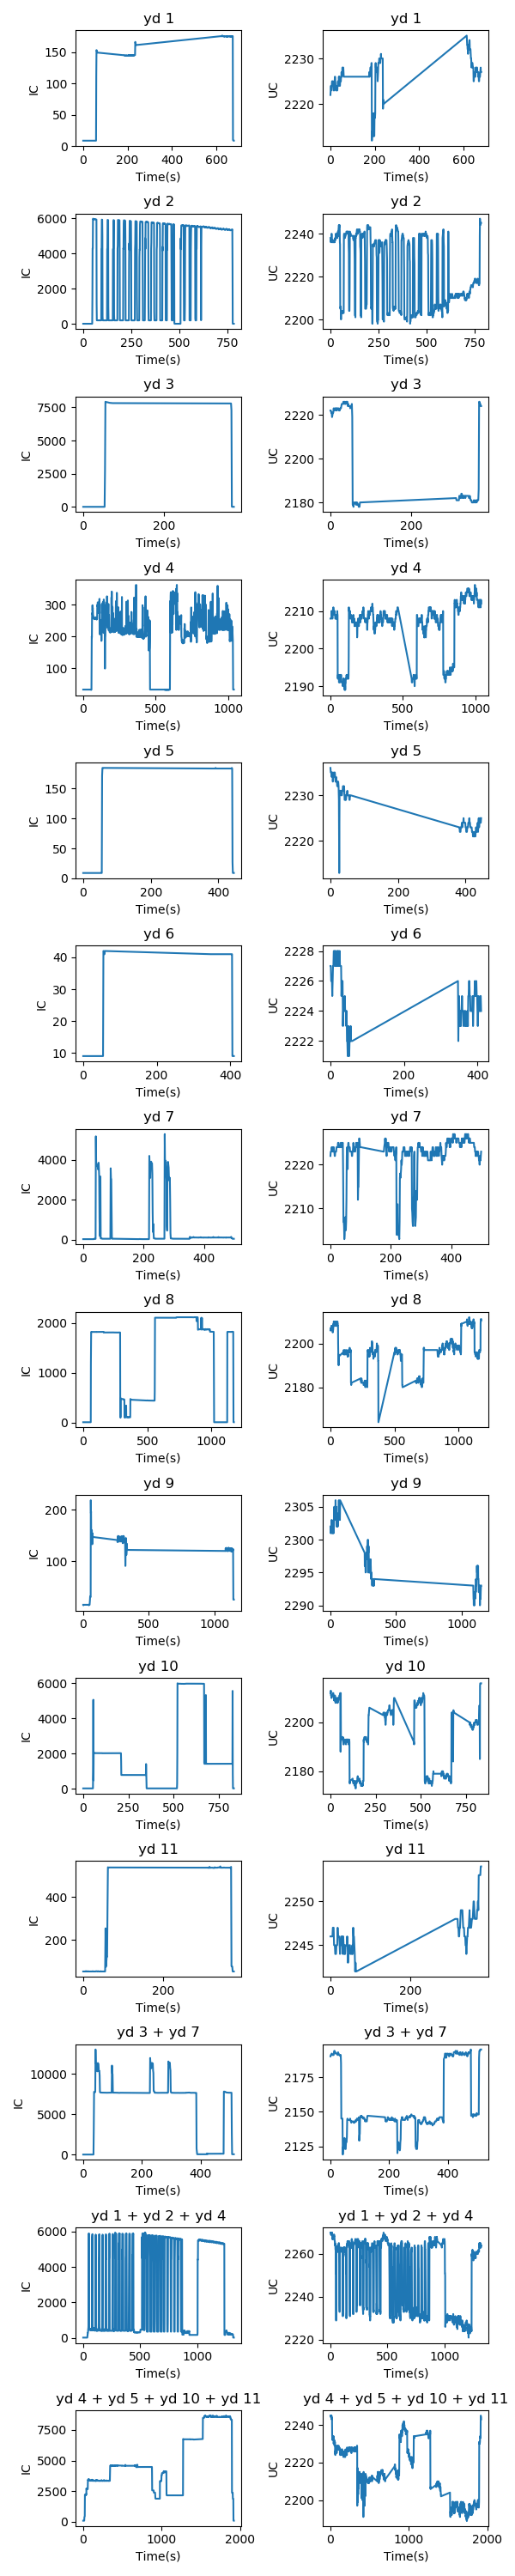

In [83]:
##各个设备的IC 与 UC 随着时间变化。

name = ['IC', 'UC']
fig = plt.figure(figsize=(6, 30))

num=1

for i in range(0,len(equip_data)):
    for c in name:
        ax = fig.add_subplot(len(equip_data),len(name),num)
        num = num+1
        x=[]
        for t in range(0, len(equip_data[i]['time'])):
            x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
        ax.plot(x,equip_data[i][c])
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))
        

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


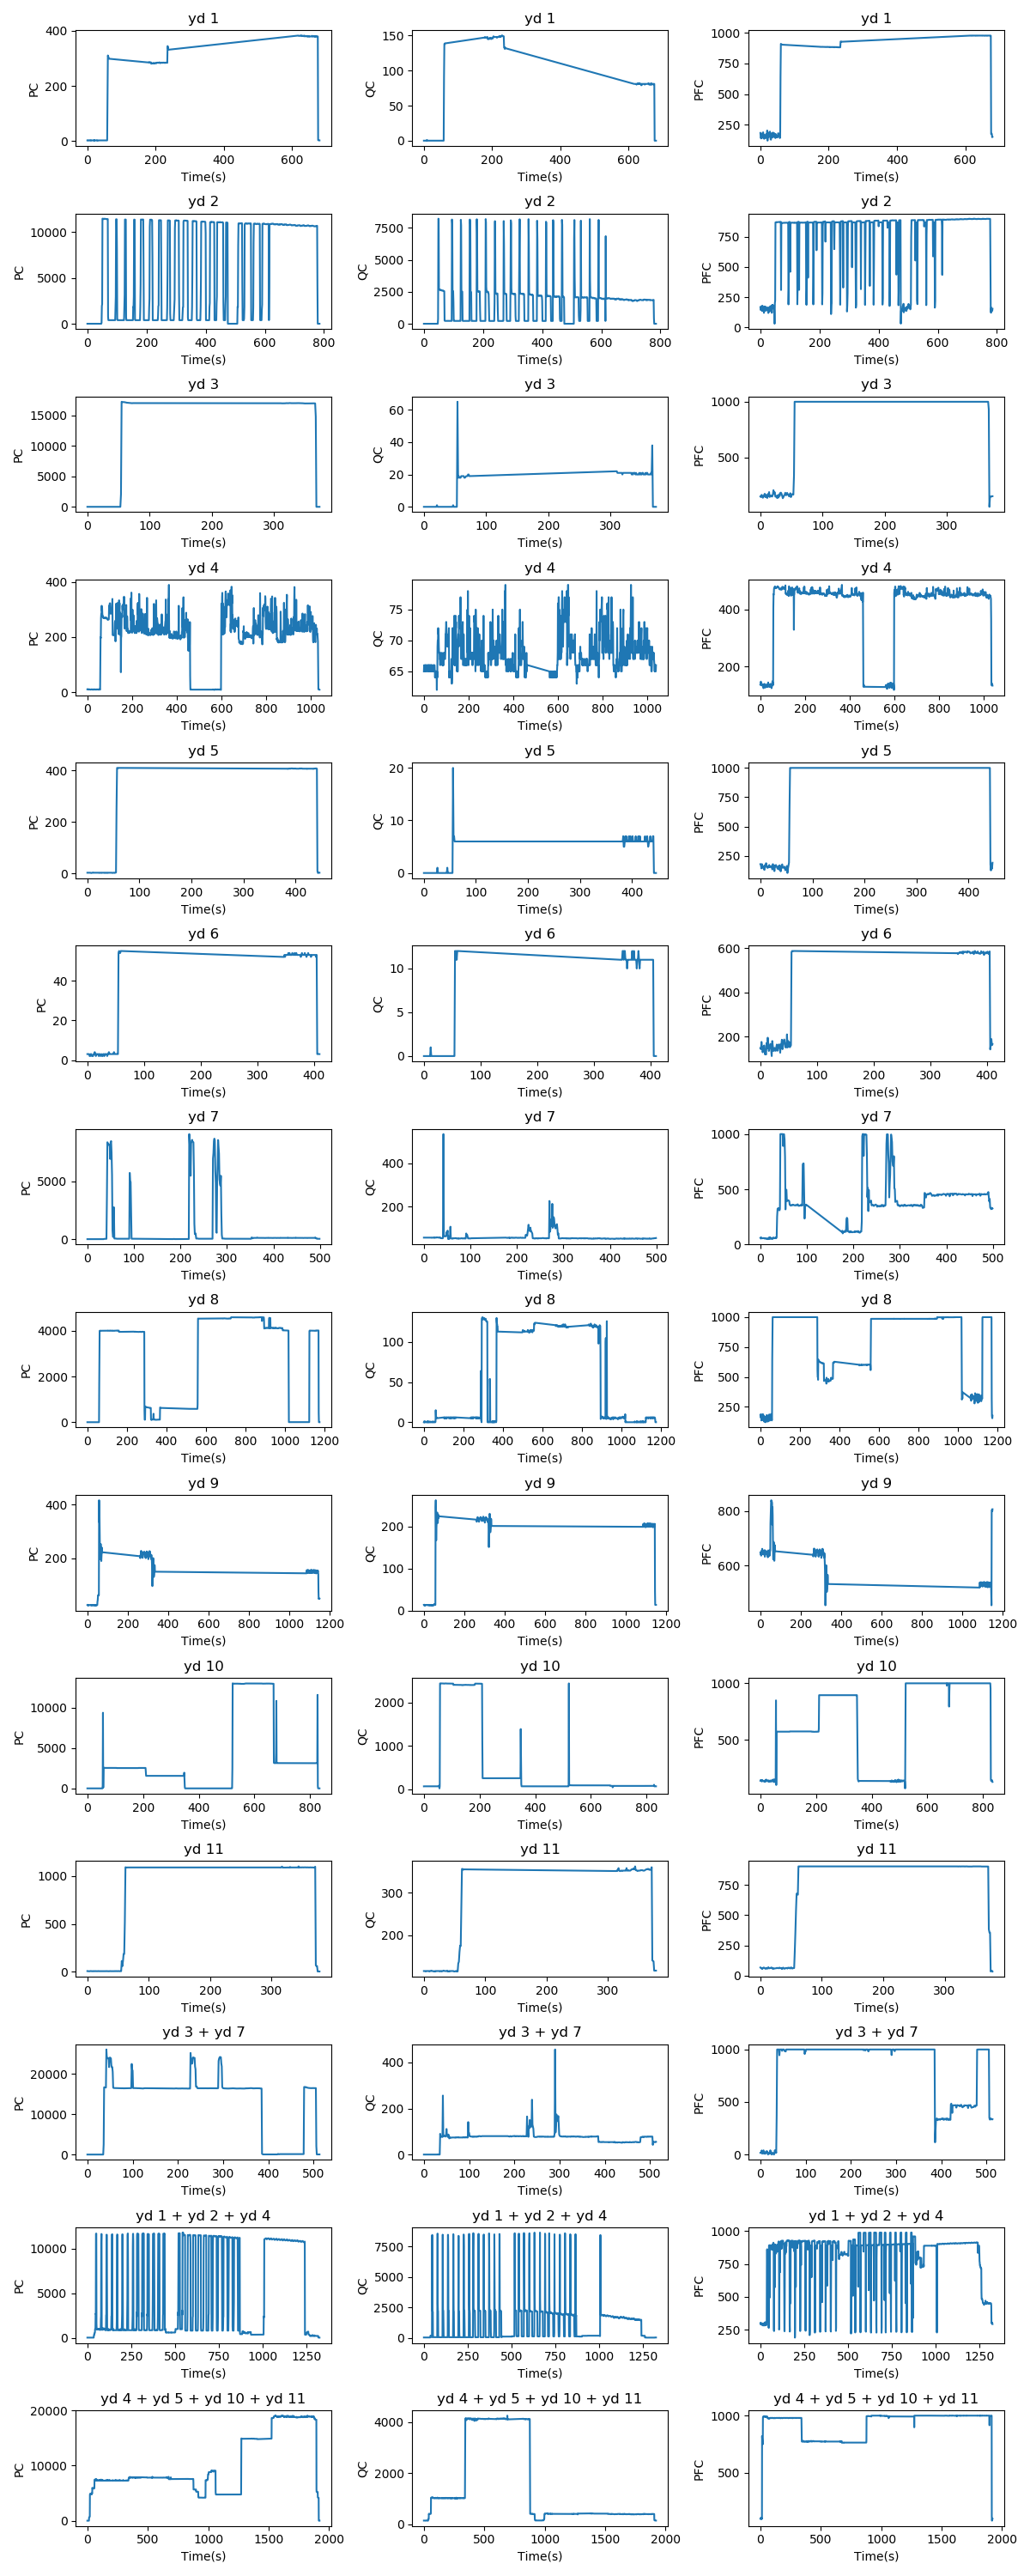

In [84]:
## 各个设备的PC， QC 和 PFC 随时间变化

name = ['PC', 'QC', 'PFC']
fig = plt.figure(figsize=(12, 30))

num=1

for i in range(0,len(equip_data)):
    for c in name:
        ax = fig.add_subplot(len(equip_data),len(name),num)
        num = num+1
        x=[]
        for t in range(0, len(equip_data[i]['time'])):
            x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
        ax.plot(x, equip_data[i][c])
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))

plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


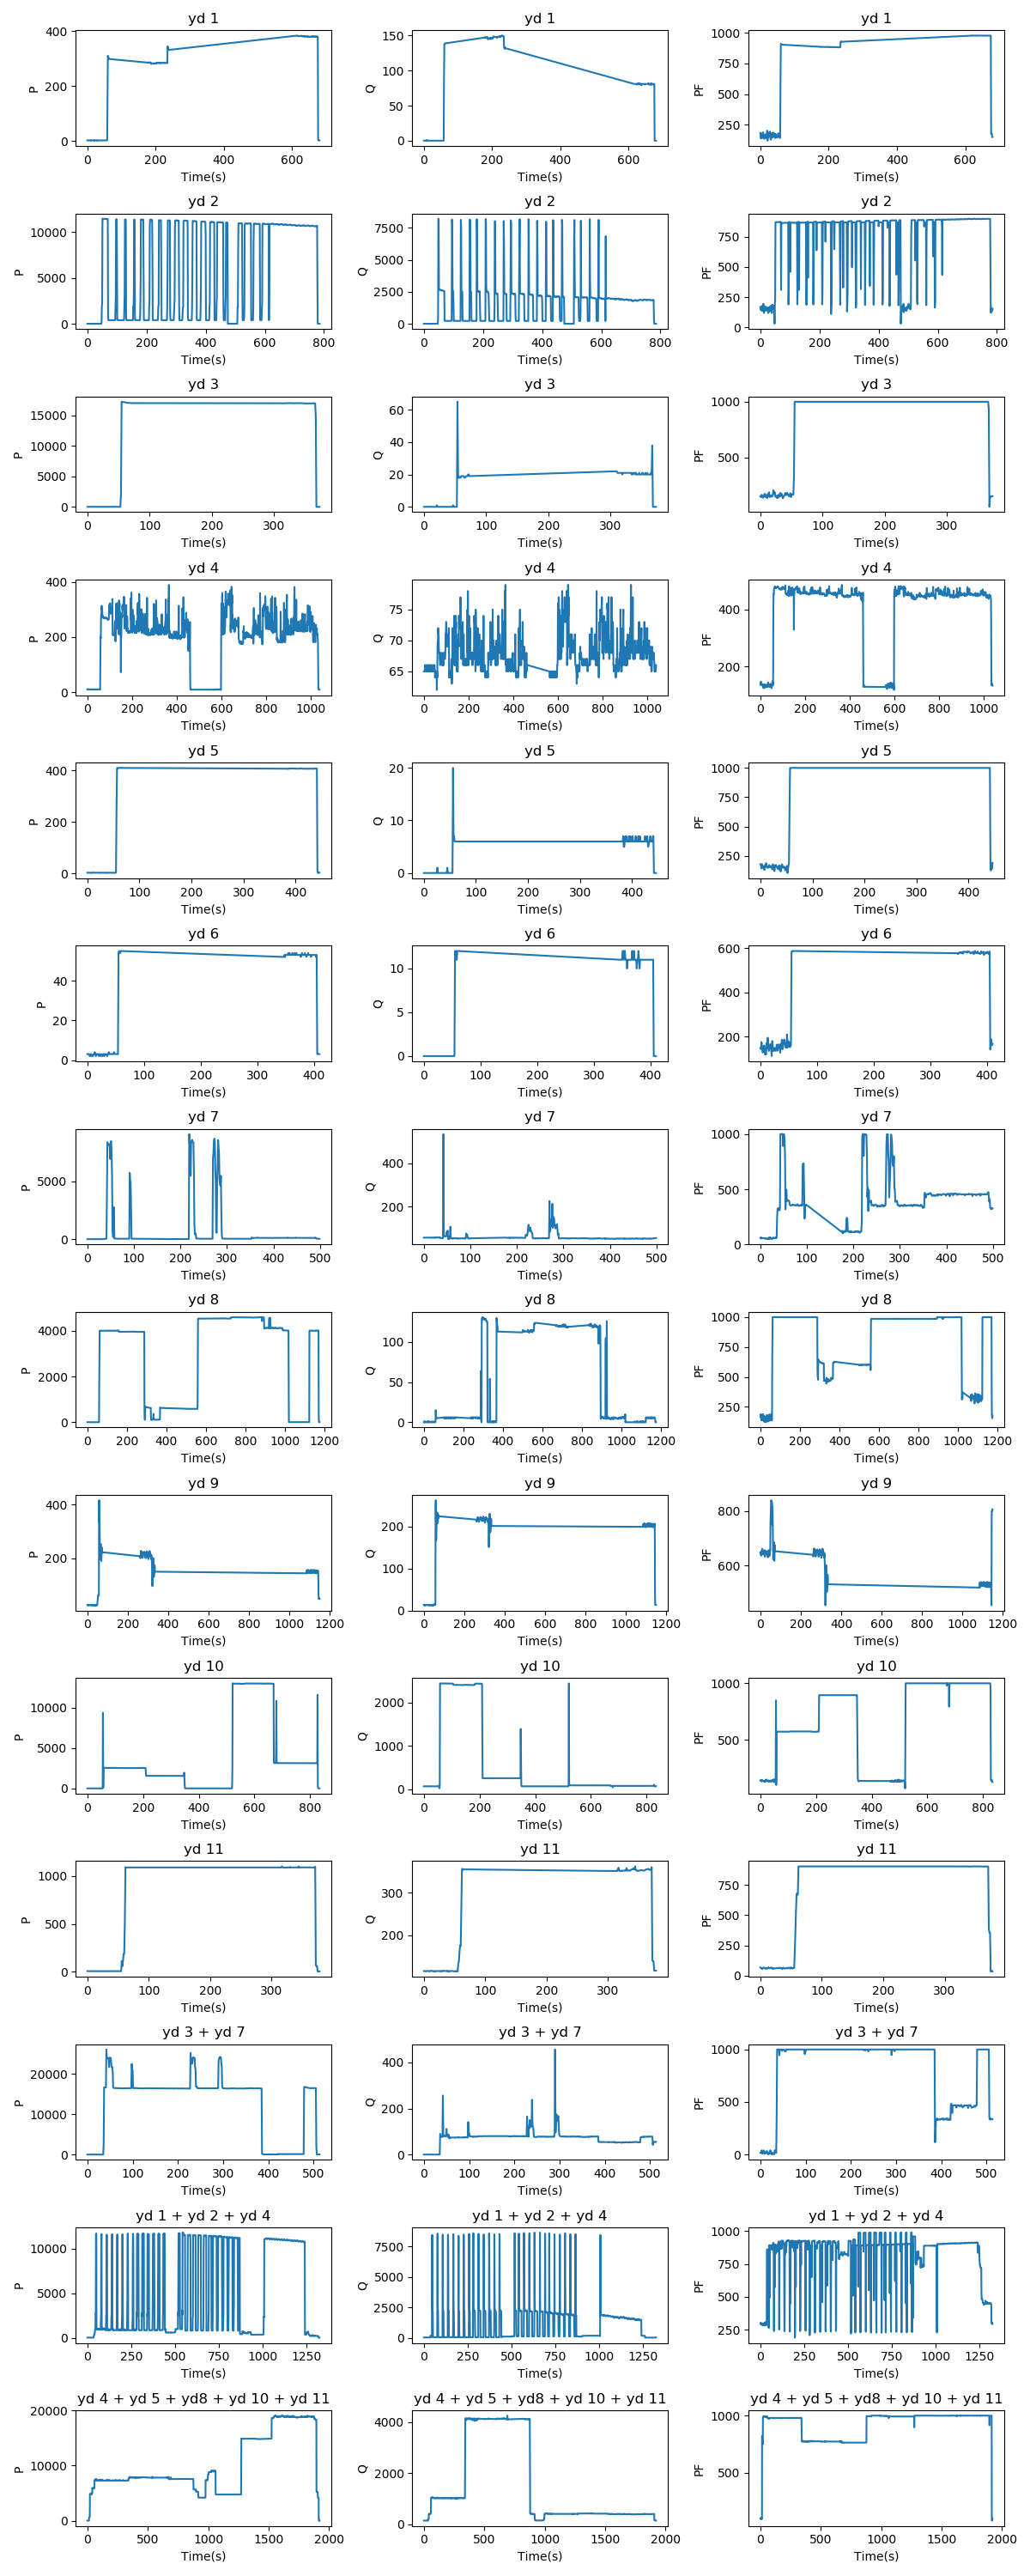

In [85]:
## 各个设备的P， Q 和 PF 随时间变化



name = ['P', 'Q', 'PF']
fig = plt.figure(figsize=(12, 30))

num=1

for i in range(0,len(equip_data)):
    for c in name:
        ax = fig.add_subplot(len(equip_data),len(name),num)
        num = num+1
        x=[]
        for t in range(0, len(equip_data[i]['time'])):
            x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
        ax.plot(x, equip_data[i][c])
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        if i==11:
            plt.title('yd 3 + yd 7')
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4')
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11')
        else:   
            plt.title('yd %d' %(i+1))

plt.tight_layout()
plt.show()

In [86]:
period_data[0].head()

time    IC001    IC002    IC003    IC004    IC005    IC006  \
0 2018-01-25 14:55:44  1666579      133      149      111       64       34   
1 2018-01-25 14:55:45  1666639       81  1666561  1666557  1666459  1666548   
2 2018-01-25 14:55:46  1666584  1666520  1666625       19       53  1666521   
3 2018-01-25 14:55:47      124      152       84       24      109       27   
4 2018-01-25 14:55:48  1666573      131       59  1666655       71  1666553   

     IC007    IC008    IC009   ...       UC119    UC120    UC121    UC122  \
0  1666650  1666624  1666550   ...     1622152  1618527  1613924  1603431   
1  1666638  1666550  1666480   ...       45832    40594    34290    21024   
2  1666535  1666641  1666525   ...      116243   115530   108853   102511   
3  1666481  1666598      106   ...      137244   138031   139219   139184   
4  1666485  1666645      183   ...      101440   103262   111804   113170   

     UC123    UC124    UC125    UC126    UC127    UC128  
0  1600470  1593617  1591364  1582627  1580816  1576276  
1    15188    10817     1403  1658520  1655265  1644926  
2   102151    95334    95012    87565    85110    76512  
3   139536   139506   139511   139590   138140   134726  
4   119161   124020   123130   127047   130473   133103  

[5 rows x 257 columns]

<IPython.core.display.Javascript object>


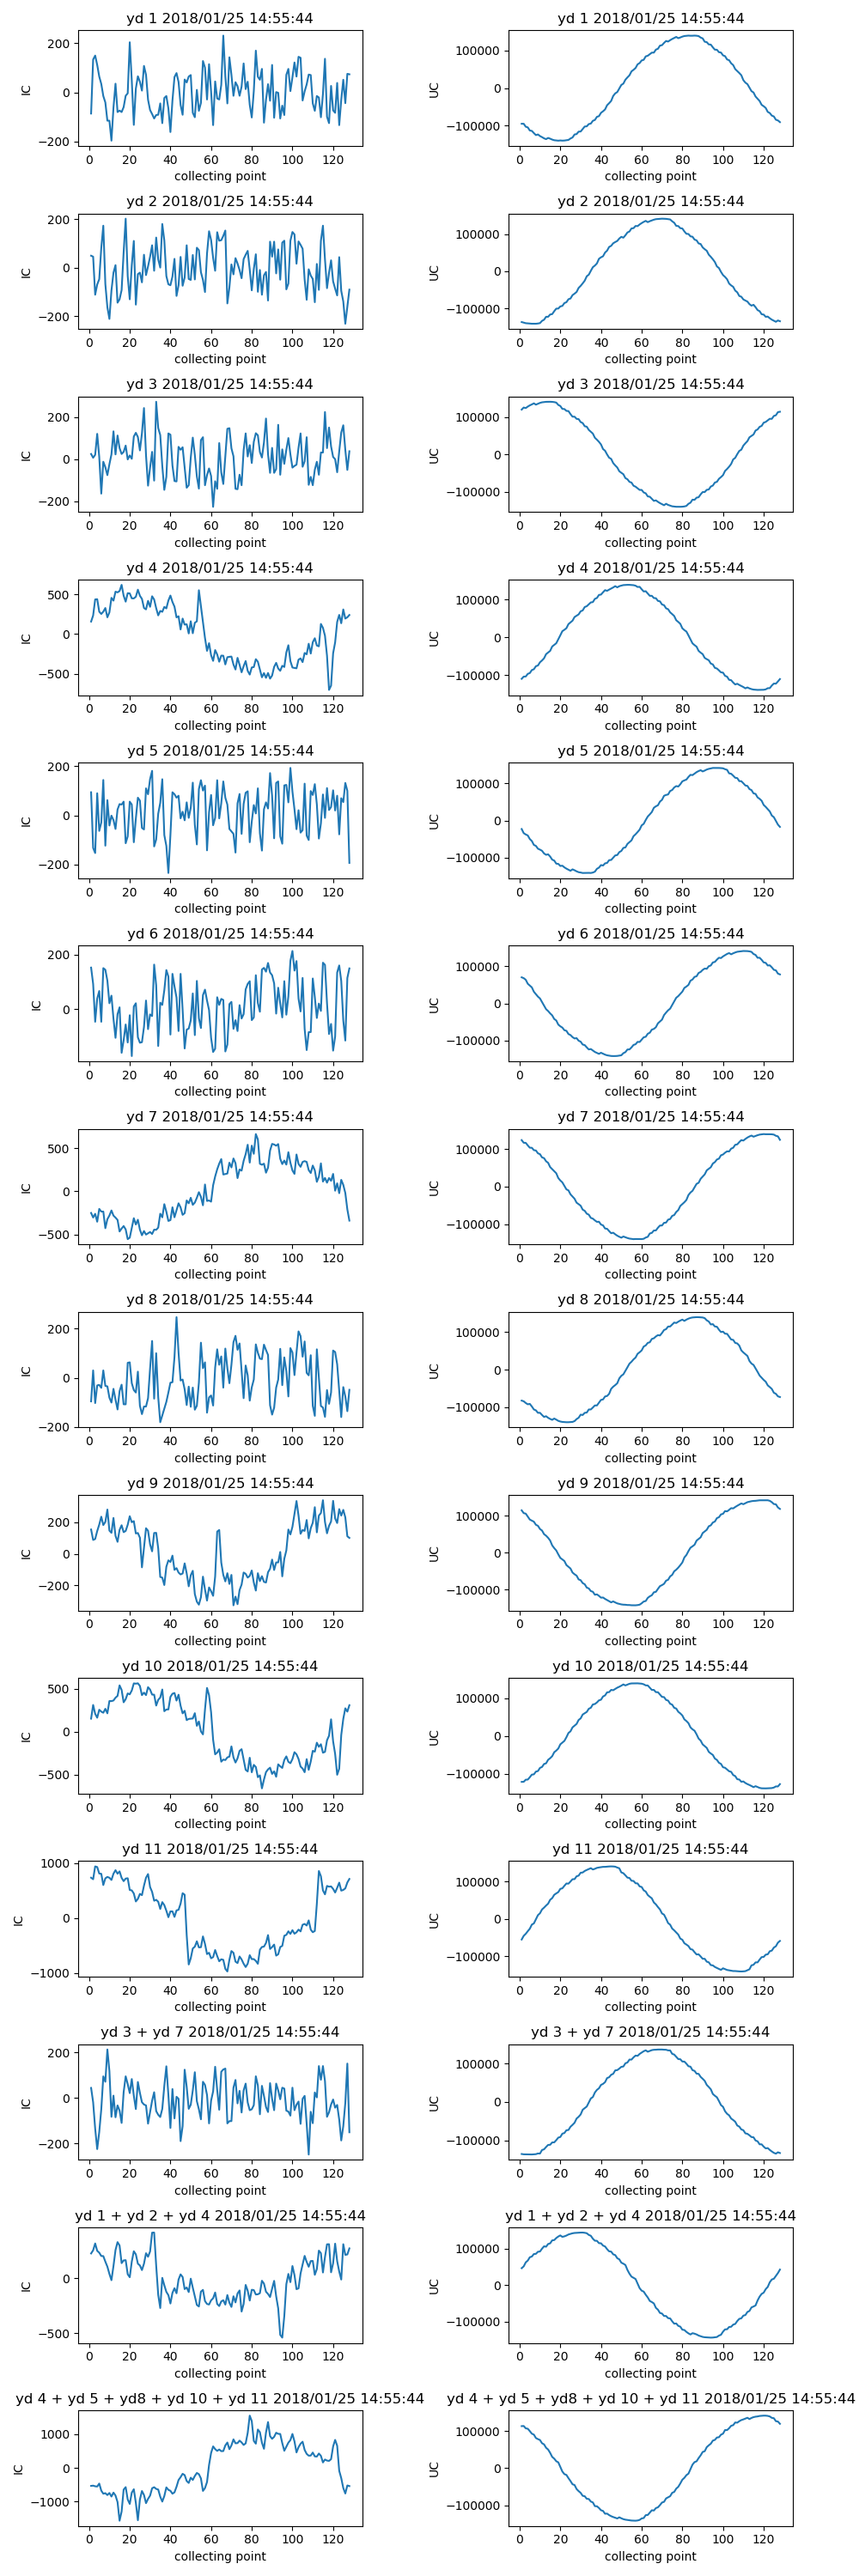

In [87]:
## IC 和 UC的周波数据，每个有128个数据采集点， 先看第一行 time=0;

fig = plt.figure(figsize=(10, 30))
x=range(1,129)
num=1
time=0
for i in range(0,len(period_data)):
    for c in [1, 129]:
        ax = fig.add_subplot(len(period_data),2,num)
        num = num+1
        tmp = period_data[i].iloc[time][c:c+128]
        for k in range(len(tmp)):
            if(tmp[k]>1000000):
                tmp[k]=tmp[k]-1666665
        ax.plot(x,tmp)
        plt.xlabel('collecting point')
        s = period_data[0].iloc[time][0].strftime('%Y/%m/%d %H:%M:%S')
        if c==1:
            plt.ylabel('IC')
        else:
            plt.ylabel('UC')

        if i==11:
            plt.title('yd 3 + yd 7 '+s)
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4 '+s)
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11 '+s)
        else:   
            plt.title('yd %d ' %(i+1)+s)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


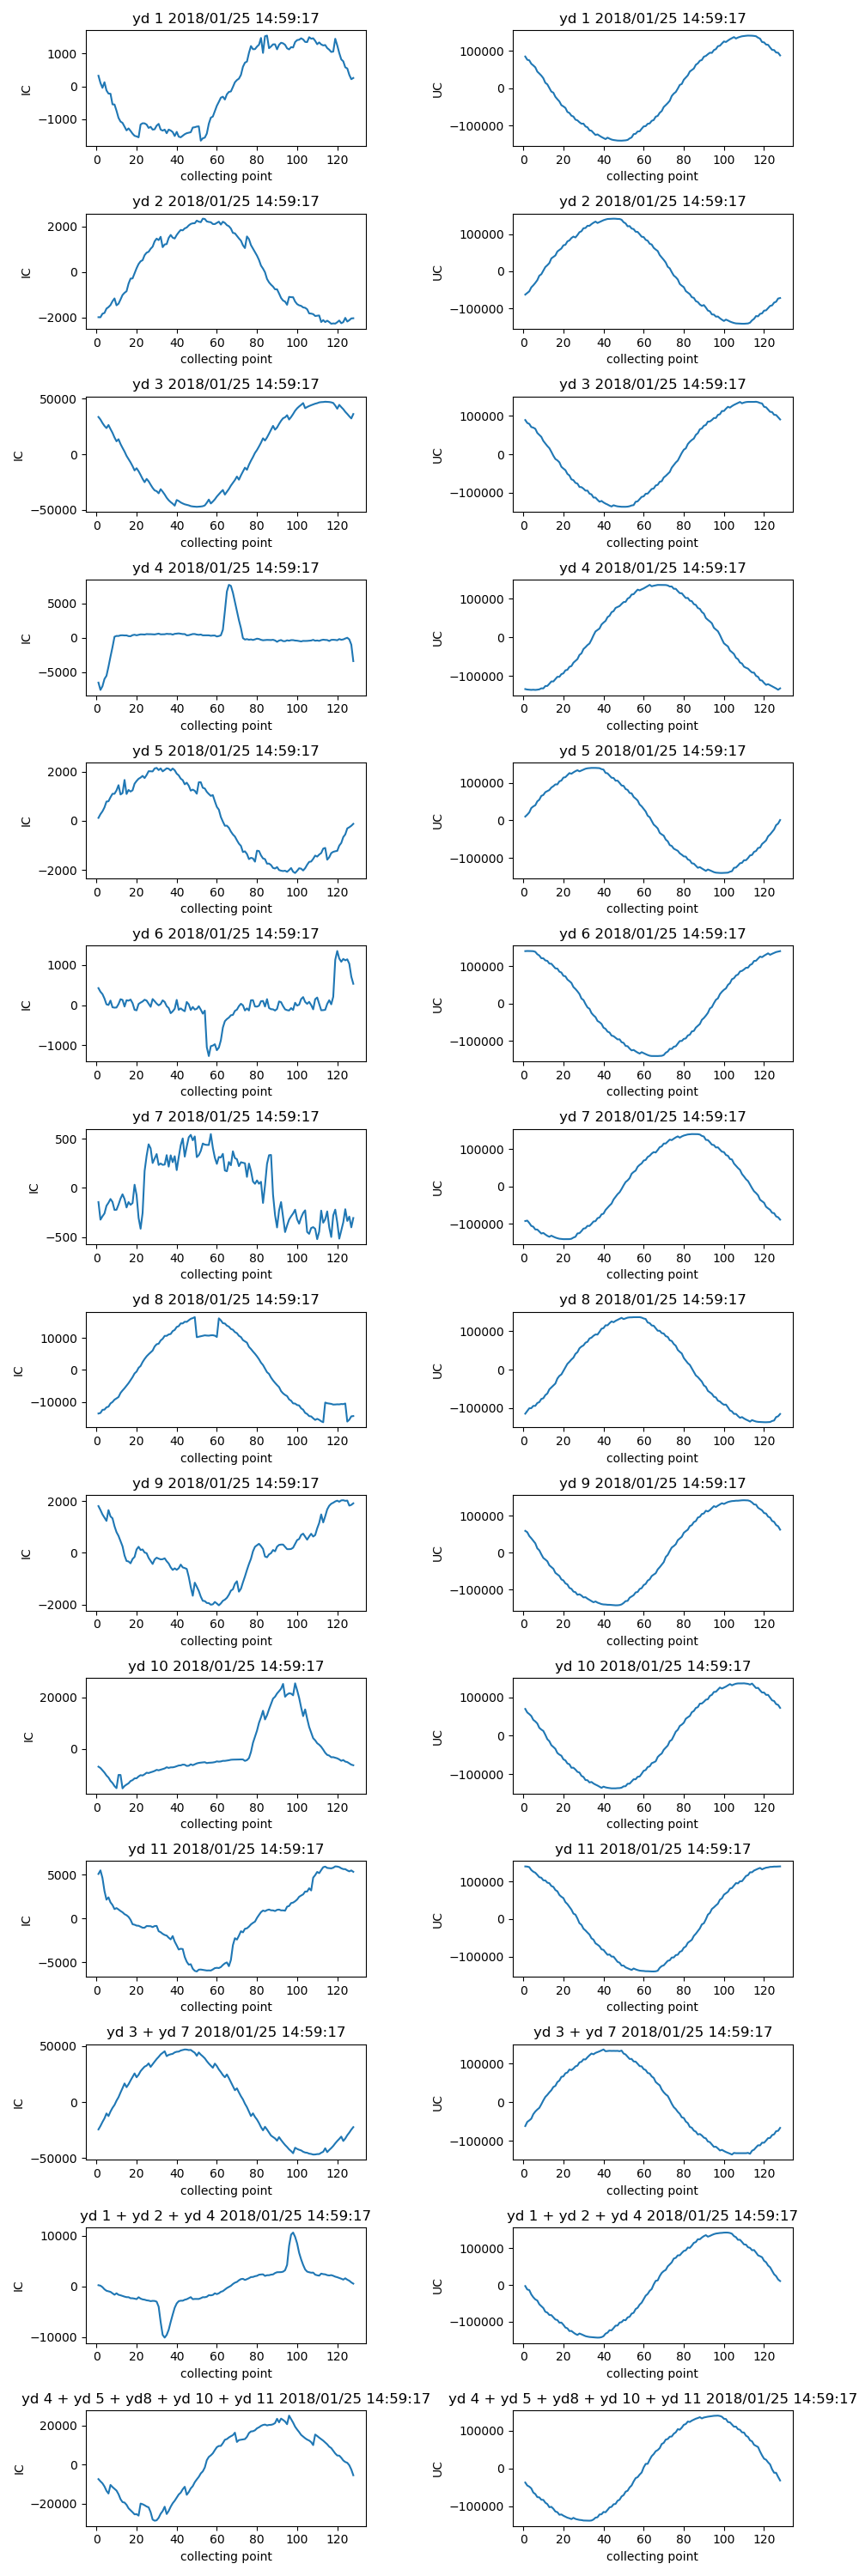

In [88]:
## IC 和 UC的周波，每个有128个数据采集点， 再看看100行的时候 time=100 （稳定的时候？）;



fig = plt.figure(figsize=(10, 30))
x=range(1,129)
num=1
time=100
for i in range(0,len(period_data)):
    for c in [1, 129]:
        ax = fig.add_subplot(len(period_data),2,num)
        num = num+1
        tmp = period_data[i].iloc[time][c:c+128]
        for k in range(len(tmp)):
            if(tmp[k]>1000000):
                tmp[k]=tmp[k]-1666665
        ax.plot(x,tmp)
        plt.xlabel('collecting point')
        s = period_data[0].iloc[time][0].strftime('%Y/%m/%d %H:%M:%S')
        if c==1:
            plt.ylabel('IC')
        else:
            plt.ylabel('UC')

        if i==11:
            plt.title('yd 3 + yd 7 '+s)
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4 '+s)
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11 '+s)
        else:   
            plt.title('yd %d ' %(i+1)+s)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


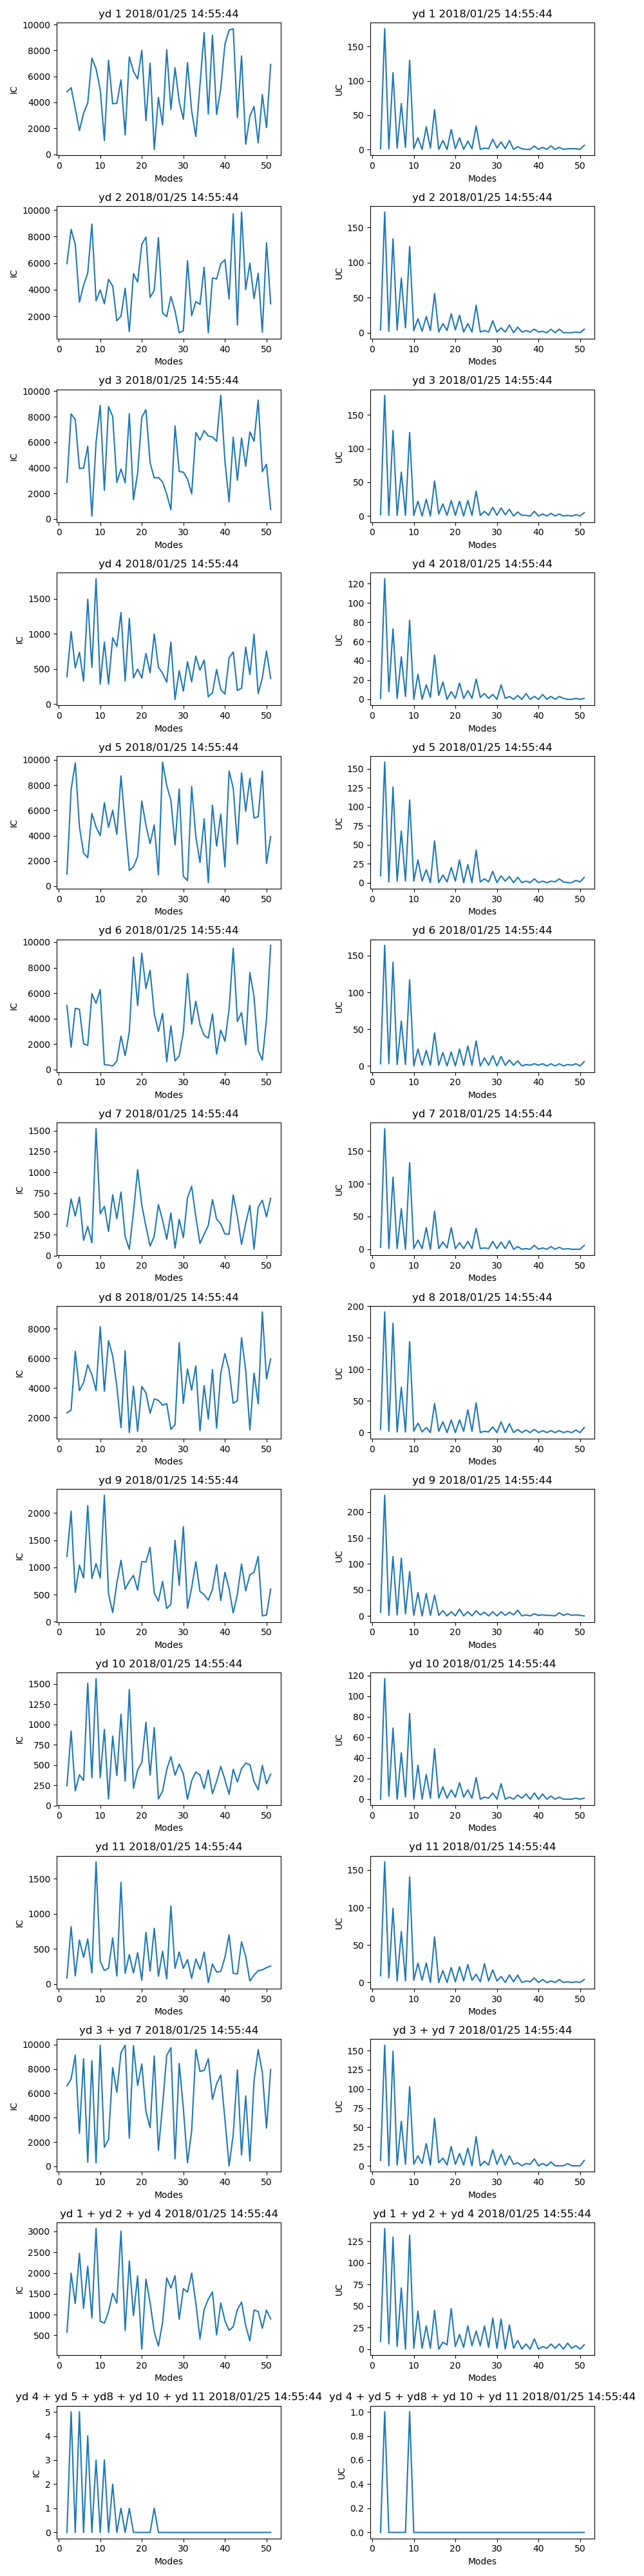

In [89]:
## IC 和 UC的谐波数据，每个都有2-51的modes，观察每个mode成分的大小， 先看看第一行的时候 time=0;



fig = plt.figure(figsize=(10, 40))
x=range(2,52)
num=1
time=0
for i in range(0,len(harmonic_data)):
    for c in [1, 51]:
        ax = fig.add_subplot(len(harmonic_data),2,num)
        num = num+1
        ax.plot(x,harmonic_data[i].iloc[time][c:c+50])
        plt.xlabel('Modes')
        if c==1:
            plt.ylabel('IC')
        else:
            plt.ylabel('UC')
        s = harmonic_data[0].iloc[time][0].strftime('%Y/%m/%d %H:%M:%S')
        if i==11:
            plt.title('yd 3 + yd 7 '+s)
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4 '+s)
        elif i==13:
            plt.title('yd 4 + yd 5 + yd8 + yd 10 + yd 11 '+s)
        else:   
            plt.title('yd %d ' %(i+1)+s)
plt.tight_layout()
plt.show()

<IPython.core.display.Javascript object>


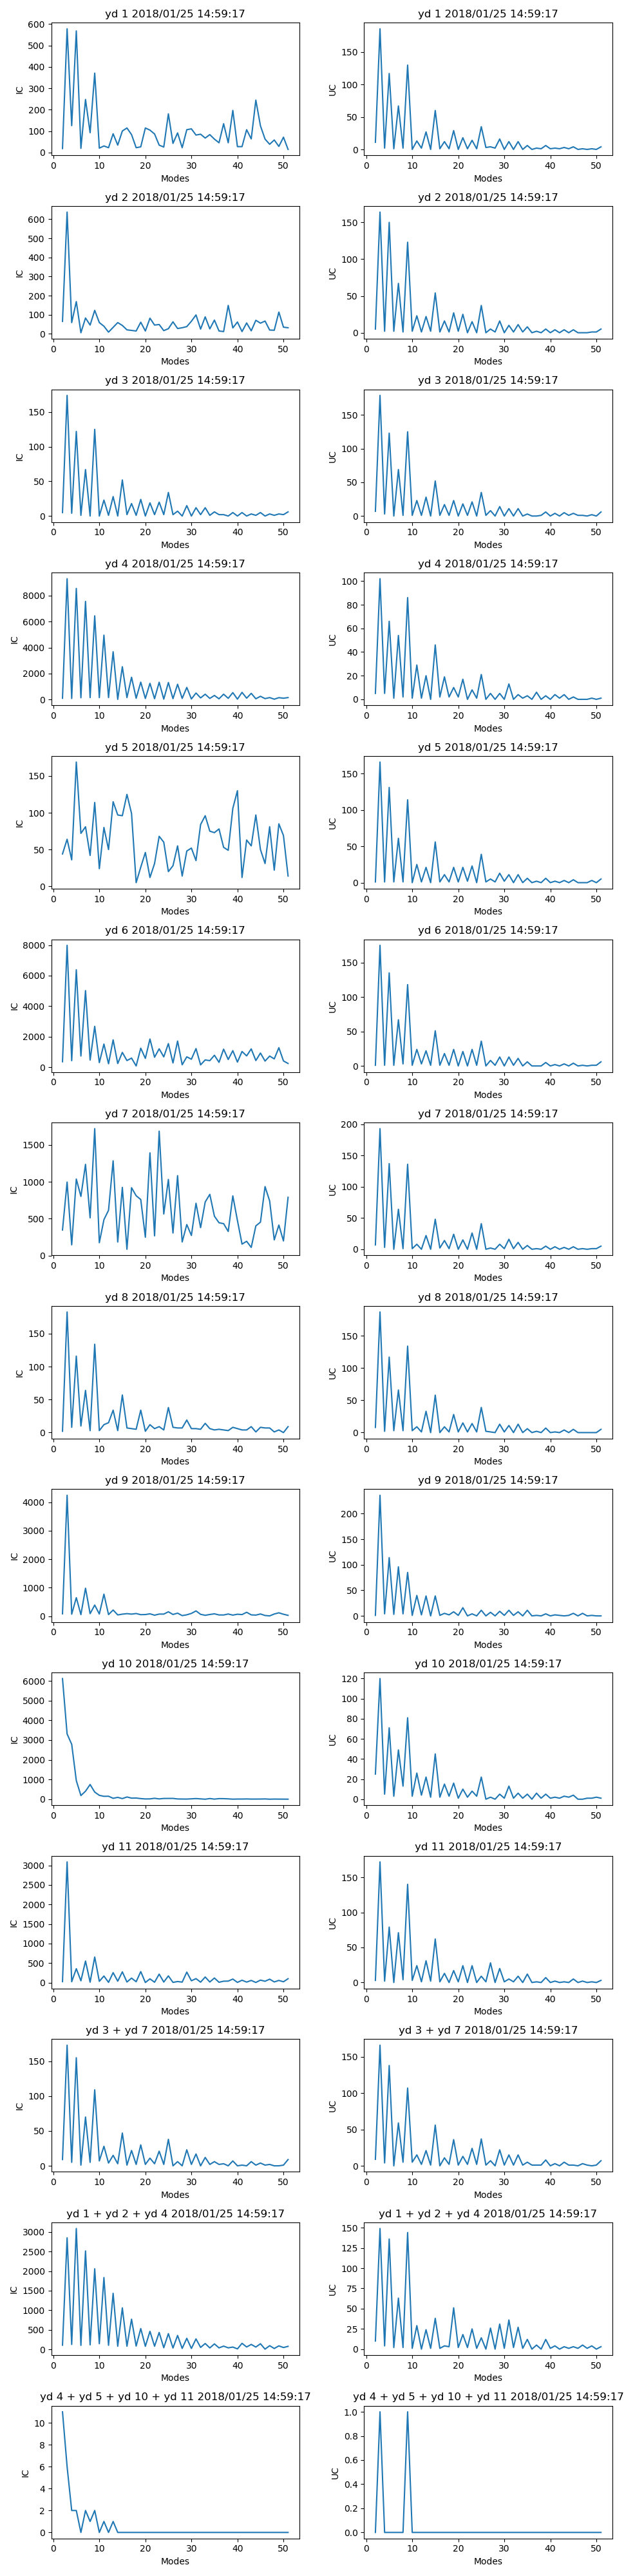

In [90]:
## IC 和 UC的谐波，每个都有2-51的modes，观察每个mode成分的大小， 先看看第100行的时候 time=100;




fig = plt.figure(figsize=(10, 40))
x=range(2,52)
num=1
time=100
for i in range(0,len(harmonic_data)):
    for c in [1, 51]:
        ax = fig.add_subplot(len(harmonic_data),2,num)
        num = num+1
        ax.plot(x,harmonic_data[i].iloc[time][c:c+50])
        plt.xlabel('Modes')
        if c==1:
            plt.ylabel('IC')
        else:
            plt.ylabel('UC')
        s = harmonic_data[0].iloc[time][0].strftime('%Y/%m/%d %H:%M:%S')
        if i==11:
            plt.title('yd 3 + yd 7 '+s)
        elif i==12:
            plt.title('yd 1 + yd 2 + yd 4 '+s)
        elif i==13:
            plt.title('yd 4 + yd 5 + yd 10 + yd 11 '+s)
        else:   
            plt.title('yd %d ' %(i+1)+s)
plt.tight_layout()
plt.show()

In [91]:
status_data = []
for i in range(0,11):
    status_data.append(yd[i].parse('操作记录'));

In [92]:
status_data[0].head()

序号                  时间   设备 工作状态   操作
0   1 2018-01-25 14:55:44  YD1   关闭  NaN
1   2 2018-01-25 14:56:43  YD1   1档   启动
2   3 2018-01-25 14:59:38  YD1   2档   切换
3   4 2018-01-25 15:03:31  YD1   3档   切换
4   5 2018-01-25 15:06:59  YD1   关闭   关闭

<IPython.core.display.Javascript object>


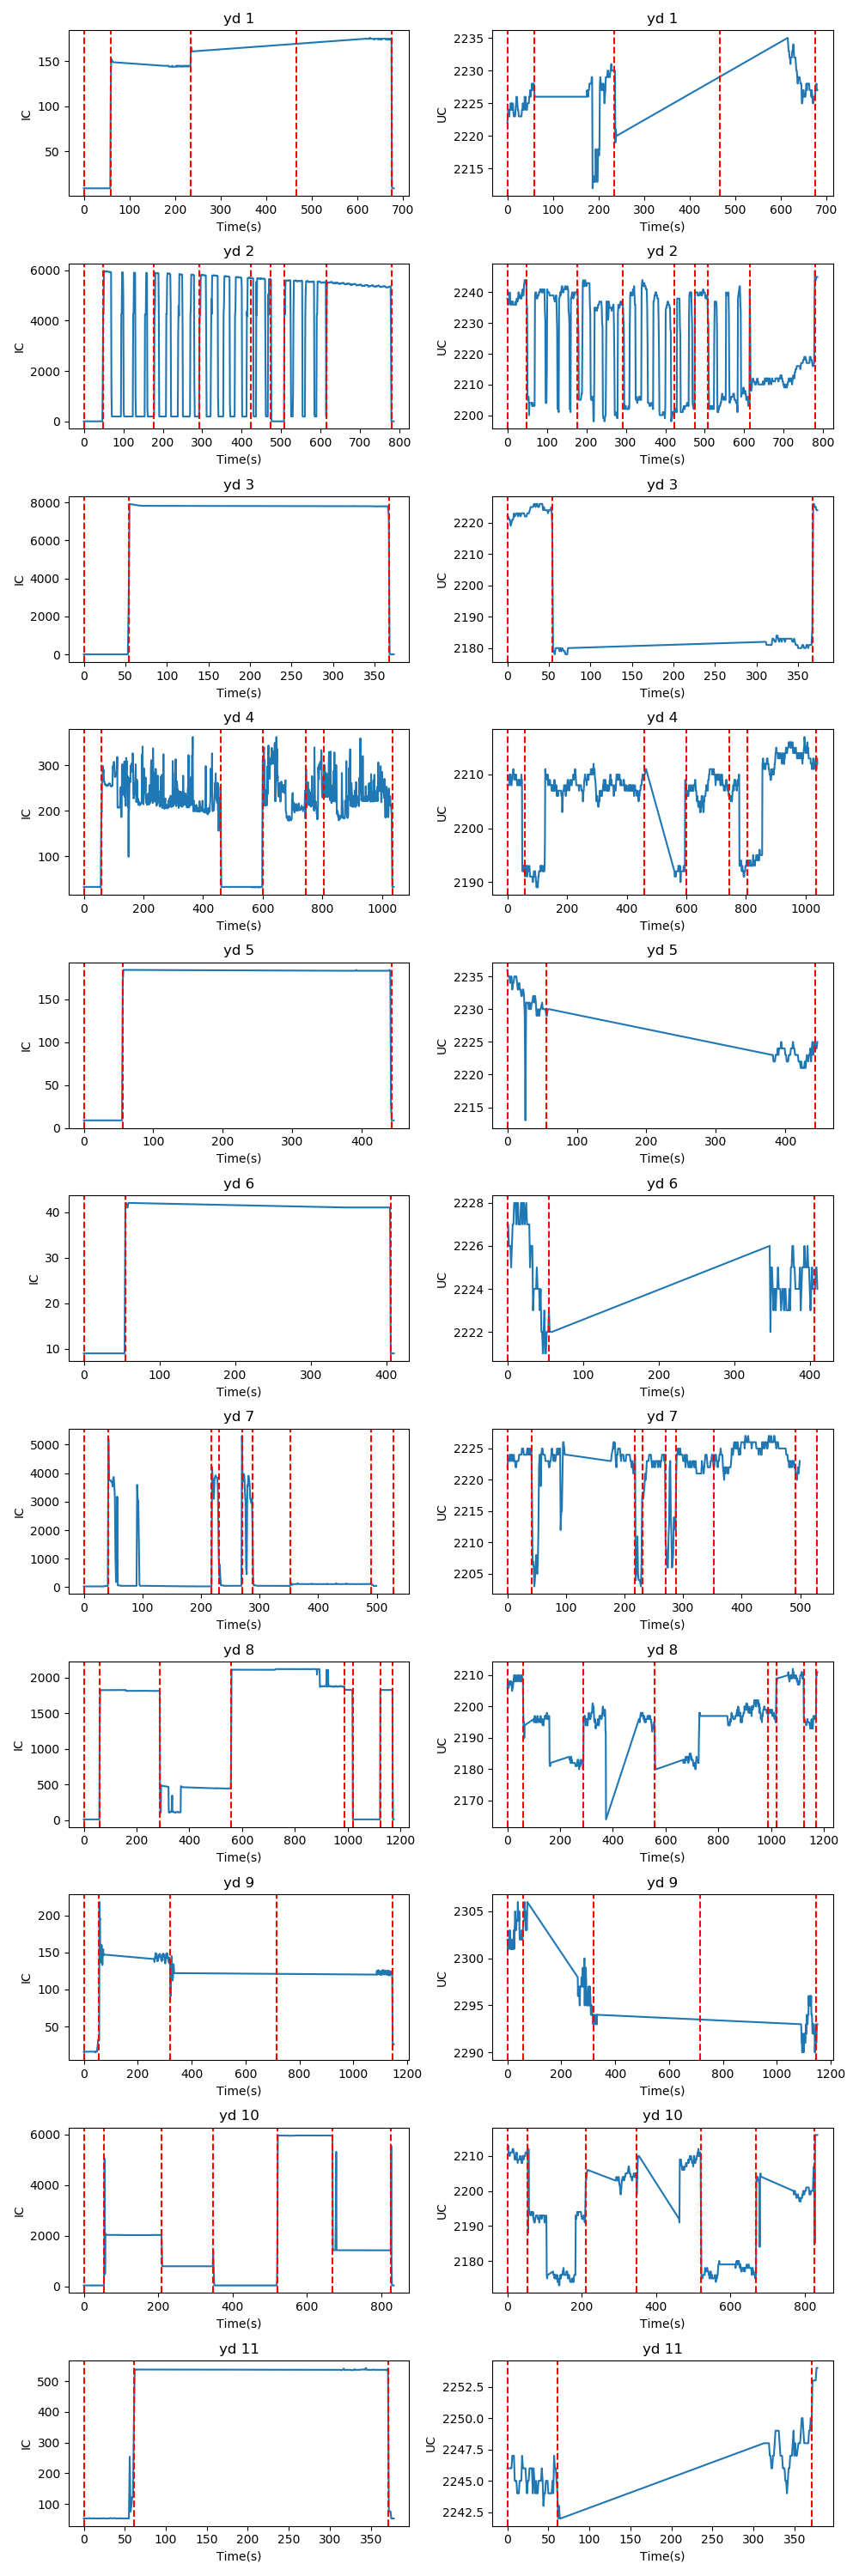

In [93]:
## IC and UC with different status.

name = ['IC', 'UC']
fig = plt.figure(figsize=(10, 30))

num=1

for i in range(0,len(equip_data[0:11])):
    x = []
    for t in range(0, len(equip_data[i]['time'])):
        x.append((equip_data[i]['time'][t] - equip_data[i]['time'][0]).seconds)
    for c in name:
        ax = fig.add_subplot(len(equip_data[0:11]),len(name),num)
        num = num+1
        ax.plot(x, equip_data[i][c])
        for k in range(0, len(status_data[i])):
            tmp = (status_data[i]['时间'][k] - equip_data[i]['time'][0]).seconds
            plt.axvline(tmp,linestyle='--', color='r')  
        plt.ylabel(c)
        plt.xlabel('Time(s)')
        plt.title('yd %d' %(i+1))
plt.tight_layout()
plt.show()

In [94]:
status_data[6].head()

序号                  时间   设备 工作状态   操作
0   1 2018-01-25 15:26:46  YD7   关闭  NaN
1   2 2018-01-25 15:27:27  YD7   打开   启动
2   3 2018-01-25 15:30:24  YD7   打印   切换
3   4 2018-01-25 15:30:37  YD7   结束   切换
4   5 2018-01-25 15:31:16  YD7   复印   切换

In [303]:
from collections import defaultdict


map_IC = defaultdict(set)
map_IC_status = defaultdict(set)
for i in range(0, len(equip_data[0:11])):
    for j in range(0, len(status_data[i]['时间'])):
        if j == len(status_data[i]['时间'])-1:
            idx = equip_data[i]['time'] >= status_data[i]['时间'][j]
        else:
            idx = (equip_data[i]['time'] >= status_data[i]['时间'][j]) & (equip_data[i]['time'] < status_data[i]['时间'][j+1])
        s = status_data[i]['设备'][0] + ' ' + status_data[i]['工作状态'][j]
        status=list()
        tmp = equip_data[i][idx]['IC'].tolist()
        for k in range(0, len(tmp)):
            flag=0
            for m in range(0, len(status)):
                if abs(tmp[k]-status[m][0])/min(tmp[k],status[m][0]) < 0.1:
                    status[m][0] = (status[m][0]*status[m][1]+tmp[k])/(status[m][1]+1)
                    status[m][1] = status[m][1]+1
                    flag=1
                    break
            if flag==0:
                status.append([tmp[k], 1]) 
        for m in status:
            if(m[1]<5): continue
            map_IC[m[0]].add(s)
            map_IC_status[s].add(m[0])

In [304]:
map_IC_status

defaultdict(set,
            {'YD1 1档': {145.01639344262293},
             'YD1 2档': {162.8},
             'YD1 3档': {174.8793103448276},
             'YD1 关闭': {9.0},
             'YD10 1档冷风': {790.4516129032259},
             'YD10 1档热风': {2027.3208955223881},
             'YD10 2档冷风': {1424.7313432835822},
             'YD10 2档热风': {5962.942857142857},
             'YD10 关闭': {33.0},
             'YD11 关闭': {53.16981132075472},
             'YD11 打开': {537.2372881355932},
             'YD2 中低火': {200.01492537313433,
              4344.090909090909,
              5849.852941176471},
             'YD2 中火': {199.66666666666666,
              4306.666666666667,
              5750.424242424242},
             'YD2 中高火': {200.33333333333334,
              201.6153846153846,
              4245.4,
              5506.434782608696,
              5583.942857142857,
              5666.428571428572},
             'YD2 低火': {201.25581395348837,
              4270.888888888889,
              5930.7

In [305]:
def test(IC_list, time_list):
    status_list = []
    for ic in IC_list:
        if ic!=9:
            status_list.append(map_IC.get(ic, map_IC[min(map_IC.keys(), key=lambda k: abs(k-ic))]))
    for st in range(0, len(status_list)):
        if st>3 and st < len(status_list)-3 and status_list[st]!= status_list[st-3] and status_list[st]!= status_list[st+3]:
            status_list[st] = status_list [st+3] 
    

    mp={}
    for st in status_list:
        for s in st:
            s=s[:(s.find(' '))]
            mp[s]=mp.get(s,0)+1
    
    return mp
    equip = max(mp, key=mp.get)
    mp_equip_IC={}
    mp_equip_status={}
    for it in map_IC:
        for st in map_IC[it]:
            if(st.startswith(equip)):
                mp_equip_IC[it]=st
                mp_equip_status[st]=it
                
    status_list = []
    status_list.append(equip+' 关闭')
    for ic in IC_list:
        tmp = mp_equip_IC.get(ic, mp_equip_IC[min(mp_equip_IC.keys(), key=lambda k: abs(k-ic))]) 
        if len(status_list)==0 or abs(mp_equip_status[tmp]-ic) < abs(mp_equip_status[status_list[-1]]-ic)/10 :
            status_list.append(tmp)
        else:
            status_list.append(status_list[-1])
        
        
    for st in range(0, len(status_list)):
        if st>1 and st < len(status_list)-1 and status_list[st]!= status_list[st-1] and status_list[st]!= status_list[st+1]:
            status_list[st] = status_list [st-1]
            
    res = list()
    for st in range(1, len(status_list)):
        if len(res)==0 or status_list[st]!= status_list[st-1]:
            res.append(status_list[st])
    return res

In [306]:
for i in range(0,11):
    status_list=test(equip_data[i]['IC'].tolist(), equip_data[i]['time'].tolist())
    print(status_list)

{'YD8': 3, 'YD4': 5, 'YD1': 101, 'YD9': 21, 'YD3': 1, 'YD2': 1, 'YD5': 1, 'YD6': 1}
{'YD10': 9, 'YD2': 690, 'YD7': 2, 'YD3': 4, 'YD1': 4, 'YD8': 8, 'YD5': 4, 'YD6': 4}
{'YD7': 2, 'YD3': 75}
{'YD4': 854, 'YD10': 106, 'YD9': 2, 'YD2': 56, 'YD1': 2, 'YD5': 21, 'YD8': 2}
{'YD1': 1, 'YD5': 63, 'YD7': 1}
{'YD7': 3, 'YD6': 60}
{'YD7': 372, 'YD6': 2, 'YD4': 6, 'YD10': 4, 'YD11': 2, 'YD8': 33, 'YD9': 2}
{'YD10': 1, 'YD8': 542, 'YD9': 7, 'YD7': 19, 'YD3': 4, 'YD2': 4, 'YD1': 4, 'YD5': 4, 'YD6': 4, 'YD11': 1}
{'YD9': 151, 'YD4': 9, 'YD1': 28, 'YD7': 21, 'YD8': 2}
{'YD4': 123, 'YD10': 500, 'YD8': 2}
{'YD11': 120, 'YD9': 4, 'YD4': 2}


In [307]:
for i in range(0,11):
    print(status_data[i]['工作状态'].tolist())


['关闭', '1档', '2档', '3档', '关闭']
['关闭', '低火', '中低火', '中火', '中高火', '关闭', '中高火', '高火', '关闭']
['关闭', '打开', '关闭']
['关闭', '打开', '睡眠', '打开', '重启', '打开', '关闭']
['关闭', '打开', '关闭']
['关闭', '打开', '关闭']
['关闭', '打开', '打印', '结束', '复印', '结束', '扫描', '结束', '关闭']
['关闭', '加热', '制冷', '加热、制冷', '加热', '保温', '加热', '关闭']
['关闭', '制冷', '除湿', '辅热', '关闭']
['关闭', '1档热风', '1档冷风', '关闭', '2档热风', '2档冷风', '关闭']
['关闭', '打开', '关闭']


In [308]:
len(map_IC_status)

42

In [309]:
map_IC_status_diff=defaultdict(set)
map_IC_diff=defaultdict(set)
for st in map_IC_status:
    for st1 in map_IC_status:
        if st==st1:
            continue
        if st[:(st.find(' '))]!=st1[:(st1.find(' '))]:
            continue
        for i in map_IC_status[st]:
            for j in map_IC_status[st1]:
                map_IC_status_diff[st+' '+st1].add(j-i)
                map_IC_status_diff[st1+' '+st].add(i-j)
                map_IC_diff[j-i].add(st+' '+st1)
                map_IC_diff[i-j].add(st1+' '+st)

In [310]:
map_IC_status_diff

defaultdict(set,
            {'YD1 1档 YD1 2档': {17.783606557377084},
             'YD1 1档 YD1 3档': {29.86291690220466},
             'YD1 1档 YD1 关闭': {-136.01639344262293},
             'YD1 2档 YD1 1档': {-17.783606557377084},
             'YD1 2档 YD1 3档': {12.079310344827576},
             'YD1 2档 YD1 关闭': {-153.8},
             'YD1 3档 YD1 1档': {-29.86291690220466},
             'YD1 3档 YD1 2档': {-12.079310344827576},
             'YD1 3档 YD1 关闭': {-165.8793103448276},
             'YD1 关闭 YD1 1档': {136.01639344262293},
             'YD1 关闭 YD1 2档': {153.8},
             'YD1 关闭 YD1 3档': {165.8793103448276},
             'YD10 1档冷风 YD10 1档热风': {1236.8692826191623},
             'YD10 1档冷风 YD10 2档冷风': {634.2797303803563},
             'YD10 1档冷风 YD10 2档热风': {5172.491244239631},
             'YD10 1档冷风 YD10 关闭': {-757.4516129032259},
             'YD10 1档热风 YD10 1档冷风': {-1236.8692826191623},
             'YD10 1档热风 YD10 2档冷风': {-602.5895522388059},
             'YD10 1档热风 YD10 2档热风': {3

In [330]:
def test_comb(IC_list):
    status_list = []
    for ic in range(20, len(IC_list)):
        diff = IC_list[ic] - IC_list[ic-20]
        if abs(diff)>min(IC_list[ic],IC_list[ic-20])*0.1:
            status_list.append(map_IC_diff.get(diff, map_IC_diff[min(map_IC_diff.keys(), key=lambda k: abs(k-diff))]))
    for st in range(0, len(status_list)):
        if st>3 and st < len(status_list)-3 and status_list[st]!= status_list[st-3] and status_list[st]!= status_list[st+3]:
            status_list[st] = status_list [st+3] 
    
    mp={}
    for st in status_list:
        for s in st:
            mp[s[:(s.find(' '))]]=mp.get(s[:(s.find(' '))],0)+1
            s=s[(s.find(' '))+1:]
            s=s[(s.find(' '))+1:]
            mp[s[:(s.find(' '))]]=mp.get(s[:(s.find(' '))],0)+1
    return mp

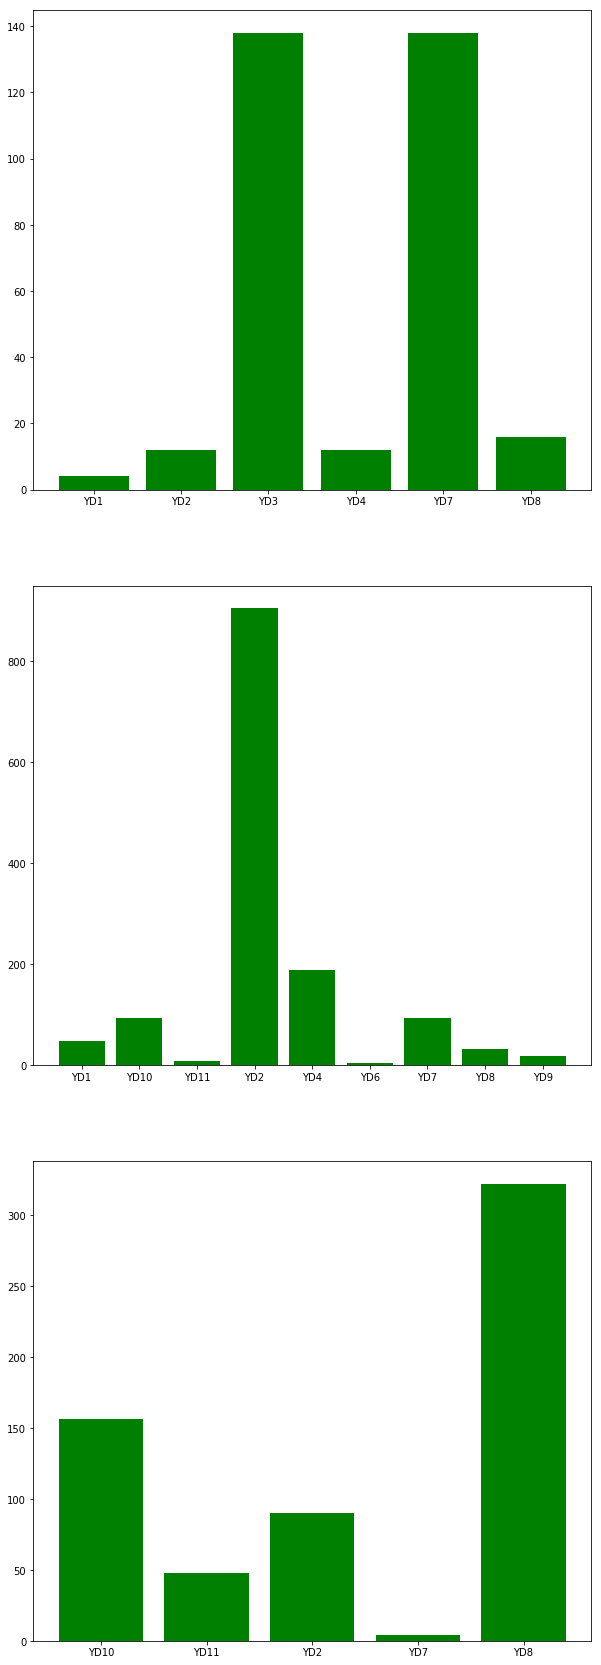

In [331]:
fig = plt.figure(figsize=(10, 30))
for i in range(11,14):
    status_list=test_comb(equip_data[i]['IC'].tolist())
    ax = fig.add_subplot(3,1,i-10)
    plt.bar(status_list.keys(), status_list.values(), color='g')
plt.show()


In [216]:
yd_unknown1 = pd.ExcelFile("../A题部分数据/附件2/设备1.xlsx")
yd_unknown2 = pd.ExcelFile("../A题部分数据/附件2/设备2.xlsx")
yd_unknown_mix1 = pd.ExcelFile("../A题部分数据/附件4/设备组1.xlsx")
yd_unknown_mix2 = pd.ExcelFile("../A题部分数据/附件4/设备组2.xlsx")
yd_unknown_mix3 = pd.ExcelFile("../A题部分数据/附件4/设备组3.xlsx")

In [217]:
equip_data_unknown1=yd_unknown1.parse('设备数据');
equip_data_unknown2=yd_unknown2.parse('设备数据');
equip_data_unknown_mix1=yd_unknown_mix1.parse('设备数据');
equip_data_unknown_mix2=yd_unknown_mix2.parse('设备数据');
equip_data_unknown_mix3=yd_unknown_mix3.parse('设备数据');

<Container object of 8 artists>

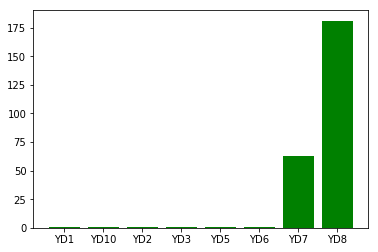

In [333]:
status_list=test(equip_data_unknown1['IC'].tolist(), equip_data_unknown1['time'].tolist())
plt.bar(status_list.keys(), status_list.values(),color='g')

<Container object of 4 artists>

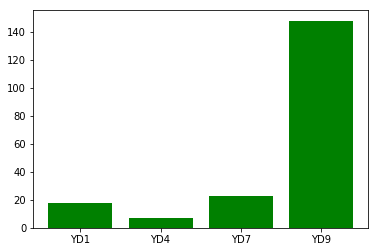

In [332]:
status_list=test(equip_data_unknown2['IC'].tolist(), equip_data_unknown2['time'].tolist())
plt.bar(status_list.keys(), status_list.values(),color='g')

<Container object of 5 artists>

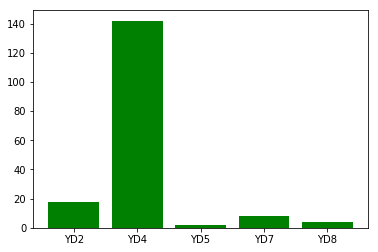

In [335]:
status_list=test_comb(equip_data_unknown_mix1['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

<Container object of 8 artists>

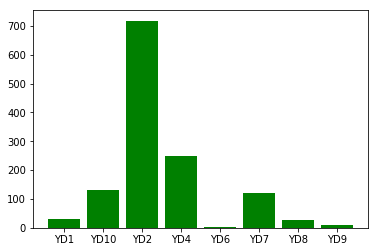

In [336]:
status_list=test_comb(equip_data_unknown_mix2['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

<Container object of 8 artists>

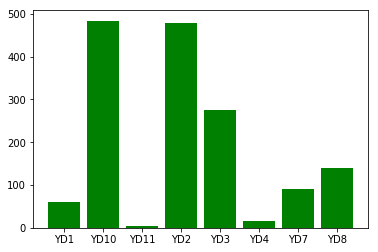

In [337]:
status_list=test_comb(equip_data_unknown_mix3['IC'].tolist())
plt.bar(status_list.keys(), status_list.values(), color='g')

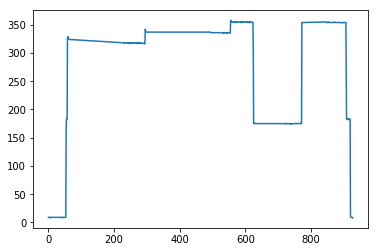

In [278]:
x=[]
for t in range(0, len(equip_data_unknown_mix1['time'])):
    x.append((equip_data_unknown_mix1['time'][t] - equip_data_unknown_mix1['time'][0]).seconds)
plt.plot(x, equip_data_unknown_mix1['IC'])

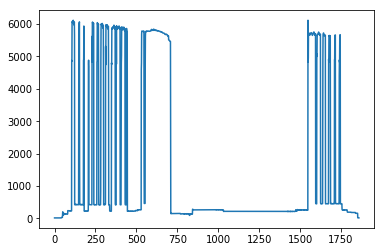

In [224]:
x=[]
for t in range(0, len(equip_data_unknown_mix2['time'])):
    x.append((equip_data_unknown_mix2['time'][t] - equip_data_unknown_mix2['time'][0]).seconds)
plt.plot(x, equip_data_unknown_mix2['IC'])


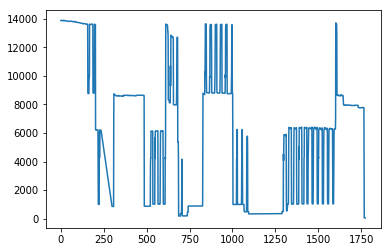

In [225]:
x=[]
for t in range(0, len(equip_data_unknown_mix3['time'])):
    x.append((equip_data_unknown_mix3['time'][t] - equip_data_unknown_mix3['time'][0]).seconds)
plt.plot(x, equip_data_unknown_mix3['IC'])

<Container object of 6 artists>

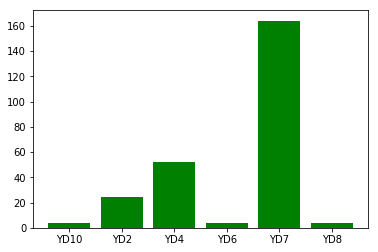

In [345]:
ls=equip_data[6]['IC']+equip_data[8]['IC']
status_list=test_comb(ls)
plt.bar(status_list.keys(), status_list.values(), color='g')

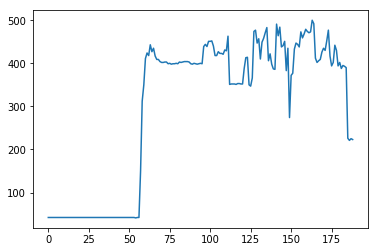

In [344]:
plt.plot(ls)

In [346]:
len(map_IC_status_diff)

144